# Plotting Denogram Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
import random

In [2]:
centers = [[1, 1], [-1, -0.5], [1, -1]]
X, y = make_blobs(n_samples=10, n_features=2, centers=centers, cluster_std=0.4, random_state=1)
X.shape

(10, 2)

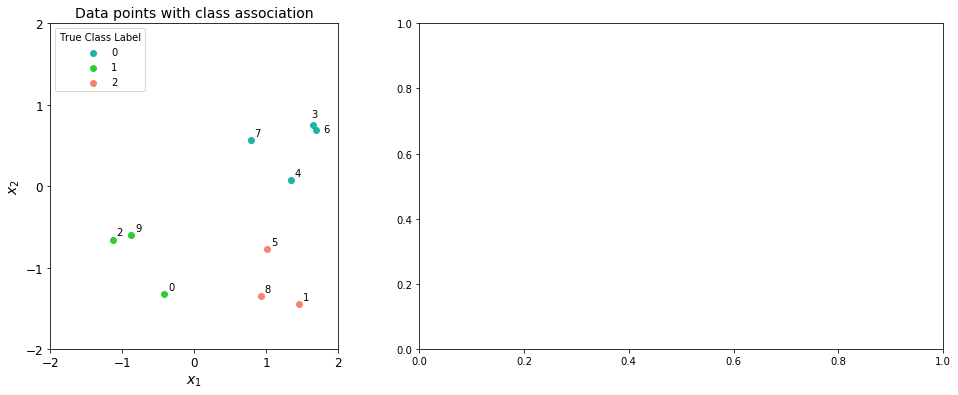

In [3]:
fig, ax = plt.subplots(figsize=(16,6), ncols=2, gridspec_kw={'width_ratios': [1.1, 2]})

#plt.scatter(X[:,0], X[:,1], c=y,);

for index, colour in [(0,'lightseagreen'), (1,'limegreen'), (2,'salmon')]:
    X_clust = X[y == index]
    ax[0].scatter(x=X_clust[:,0], y=X_clust[:,1], c=colour, label=str(index))
    
for i, values in enumerate(X):
    # 3 and 6 appear close
    if i == 3:
        ax[0].annotate(i, (X[i,0]-0.03, X[i,1]+0.1))
    elif i == 6:
        ax[0].annotate(i, (X[i,0]+0.1, X[i,1]-0.03))
    else:
        ax[0].annotate(i, (X[i,0]+0.05, X[i,1]+0.05))
    
ax[0].set_xlabel("$x_1$", fontsize=14)
ax[0].set_ylabel("$x_2$", fontsize=14)
ax[0].set_title("Data points with class association", fontsize=14)
ax[0].legend(title="True Class Label", loc="upper left");
ax[0].tick_params(axis="y", labelsize=12)
ax[0].tick_params(axis="x", labelsize=12)
ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].set_ylim(-2, 2)
ax[0].set_xlim(-2, 2);

In [4]:
import matplotlib


# Override the default linewidth.
matplotlib.rcParams['lines.linewidth'] = 2

In [5]:
Z = linkage(X, 'average', metric="euclidean")

dn = dendrogram(Z,
               leaf_font_size=14,
               distance_sort=True,
               ax=ax[1])

ax[1].set_title("Dendrogram example of euclidean average linkage clustering", fontsize=14)
ax[1].set_ylabel('Distance', fontsize=14)
ax[1].tick_params(axis="y", labelsize=12)
ax[1].set_xlabel('Data point index number', fontsize=14);

plt.tight_layout();

<Figure size 432x288 with 0 Axes>

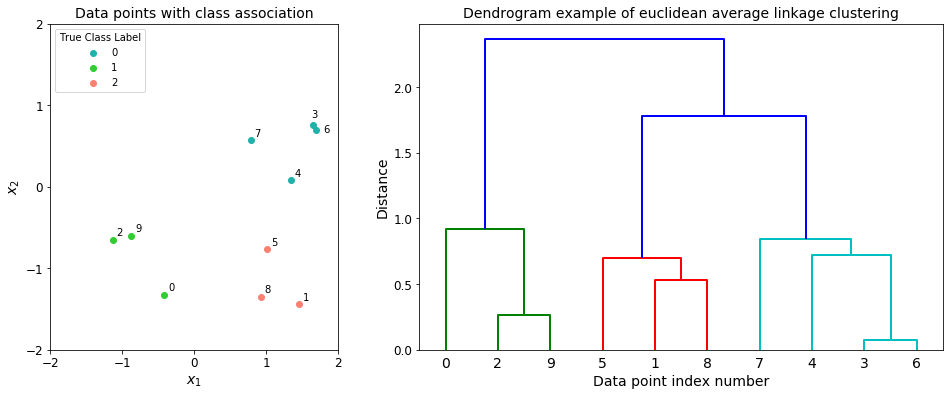

In [6]:
fig

In [7]:
fig.savefig("../images/dendrogram.png", dpi=200)

In [8]:
fig.clf()